<a href="https://colab.research.google.com/github/krishnaharish9/ML_Practice/blob/master/Time_Series_Air_Passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
from warnings import filterwarnings

In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
air=pd.read_csv('/content/drive/My Drive/DSE/Time Series/data/AirPassenger.csv')

In [0]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Year-Month                    144 non-null object
International Airlines Pax    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [0]:
air.head()

,Year-Month,International Airlines Pax
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [0]:
air['Year-Month']=air['Year-Month'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m'))
i_air=air.set_index(['Year-Month'])

In [0]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Year-Month                    144 non-null datetime64[ns]
International Airlines Pax    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


In [0]:
i_air.tail()

,International Airlines Pax
Year-Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


Rolling Statistics and ADCF test of original data

In [0]:
def stationary_test(time_series_data):
  #Calculate rolling statistics
  moving_average=time_series_data.rolling(window=12).mean()
  moving_standard=time_series_data.rolling(window=12).std()
  
  #Plot orig data vs rolling statistics
  plt.figure(figsize=(15,6))
  plt.plot(time_series_data,color='blue',label='Original data')
  plt.plot(moving_average,color='black',label='Rolling Mean')
  plt.plot(moving_standard,color='green',label='Rolling standard deviation')
  plt.legend(loc='best')
  plt.show()
  
  #Calculate Dickey-Fuller 
  print('Results of Dickey-Fuller Test')
  dftest=adfuller(time_series_data['International Airlines Pax'])
  dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-Value','Number of lags used','Number of observations used'])
  for i,j in dftest[4].items():
    dfoutput['Critical value (%s)'%i]=j
    
  print(dfoutput)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


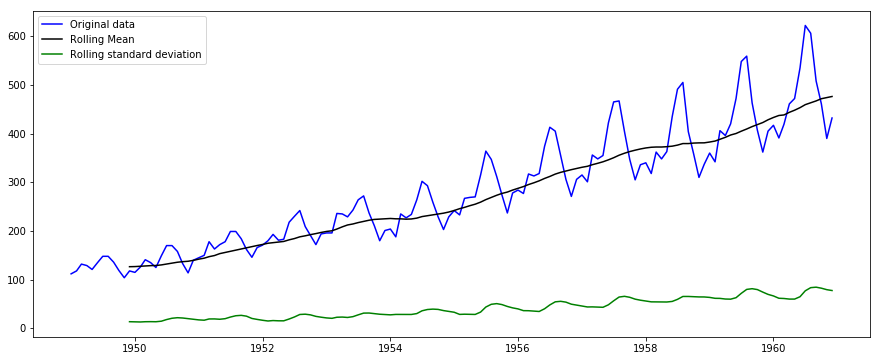

Results of Dickey-Fuller Test
Test Statistic                   0.815369
p-Value                          0.991880
Number of lags used             13.000000
Number of observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


In [0]:
stationary_test(i_air)

Rolling statistics and ADCF test over logged data

In [0]:
i_air_log=np.log(i_air)

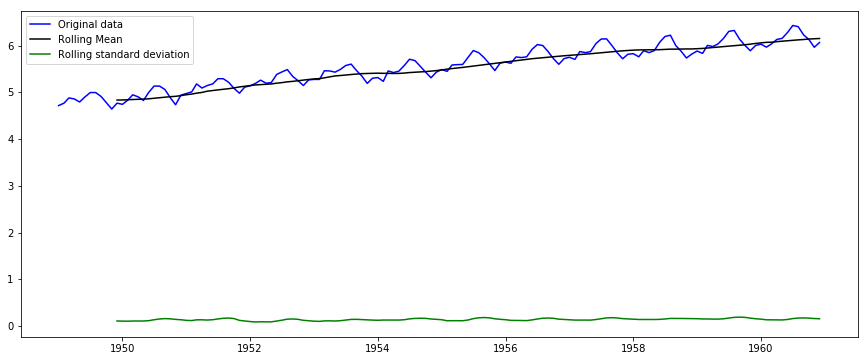

Results of Dickey-Fuller Test
Test Statistic                  -1.717017
p-Value                          0.422367
Number of lags used             13.000000
Number of observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


In [0]:
stationary_test(i_air_log)

Moving Average over the logged data

In [0]:
l_rolmean=i_air_log.rolling(window=12).mean()

subtracting the moving average data from the logged data for stationarity

In [0]:
diff_log_orig_data_l_roll_mean=i_air_log-l_rolmean
#print(diff_log_orig_data_l_roll_mean)
diff_log_orig_data_l_roll_mean.dropna(inplace=True)
#diff_log_orig_data_l_roll_mean

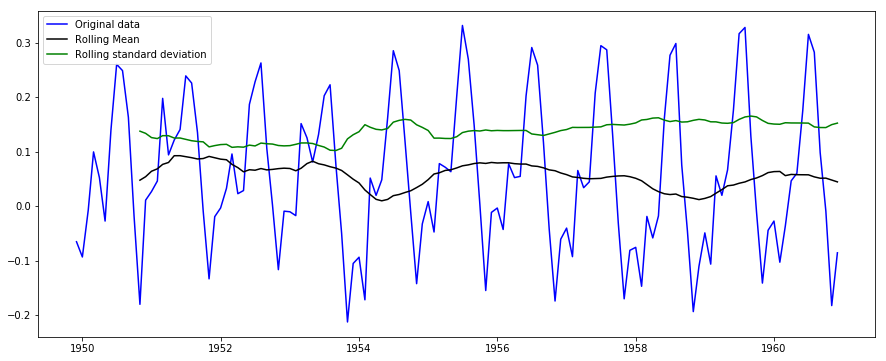

Results of Dickey-Fuller Test
Test Statistic                  -3.162908
p-Value                          0.022235
Number of lags used             13.000000
Number of observations used    119.000000
Critical value (1%)             -3.486535
Critical value (5%)             -2.886151
Critical value (10%)            -2.579896
dtype: float64


In [0]:
stationary_test(diff_log_orig_data_l_roll_mean)

Calculating the weigted average of the time series over the logged data

In [0]:
w_i_air_log=i_air_log.ewm(halflife=12).mean()

Subtracting Weighted average from the original logged data for stationarity

In [0]:
diff_w_log_air=i_air_log - w_i_air_log
diff_w_log_air.dropna(inplace=True)

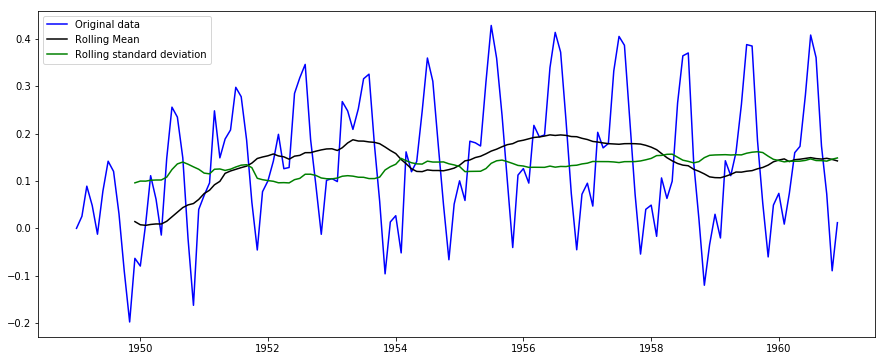

Results of Dickey-Fuller Test
Test Statistic                  -3.601262
p-Value                          0.005737
Number of lags used             13.000000
Number of observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


In [0]:
stationary_test(diff_w_log_air)

Subtracting shifted logged data from original logged data 

In [0]:
diff_i_air_log_s=i_air_log - i_air_log.shift()
diff_i_air_log_s.dropna(inplace=True)

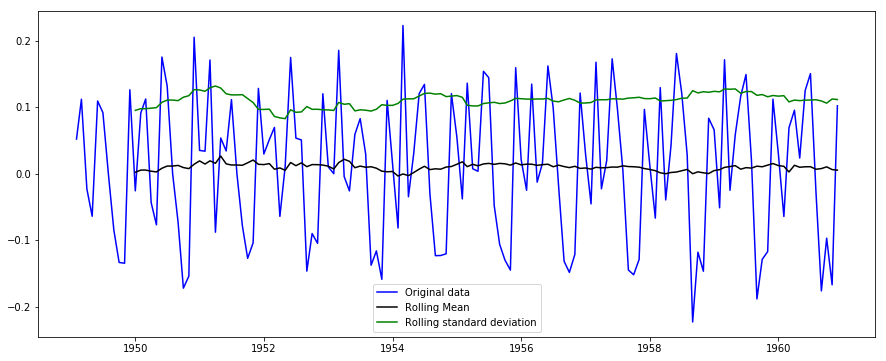

Results of Dickey-Fuller Test
Test Statistic                  -2.717131
p-Value                          0.071121
Number of lags used             14.000000
Number of observations used    128.000000
Critical value (1%)             -3.482501
Critical value (5%)             -2.884398
Critical value (10%)            -2.578960
dtype: float64


In [0]:
stationary_test(diff_i_air_log_s)

Decomposing the original logged data

In [0]:
dec=seasonal_decompose(i_air_log)

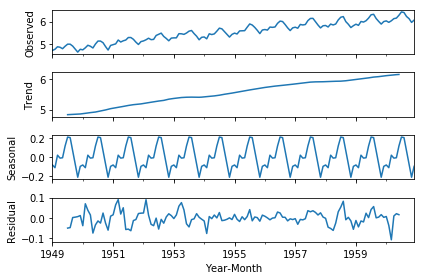

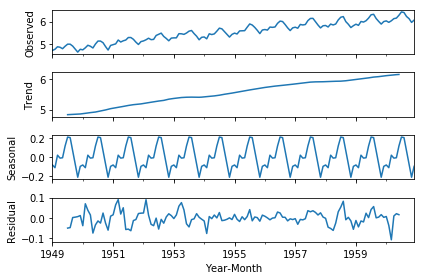

In [0]:
dec.plot()

Finding the Trend, Seasonal and Residual over the decomposed data

In [0]:
trend=dec.trend
seas=dec.seasonal
res=dec.resid

Plotting Original data, trend,seasonality and residuals

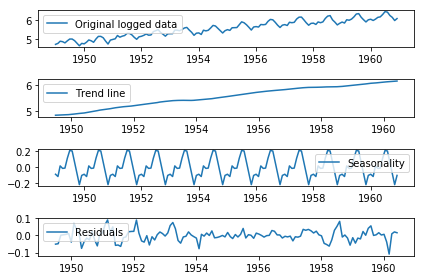

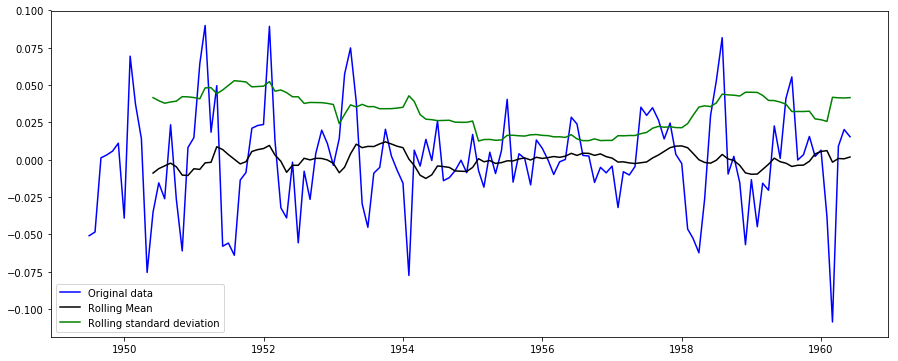

Results of Dickey-Fuller Test
Test Statistic                -6.332387e+00
p-Value                        2.885059e-08
Number of lags used            9.000000e+00
Number of observations used    1.220000e+02
Critical value (1%)           -3.485122e+00
Critical value (5%)           -2.885538e+00
Critical value (10%)          -2.579569e+00
dtype: float64


In [0]:
#plt.figure(figsize=(15,6))
plt.subplot(411)
plt.plot(i_air_log,label='Original logged data')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend line')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seas,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(res,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

clone_resid=res
clone_resid.dropna(inplace=True)
stationary_test(clone_resid)

Plotting ACF(Auto correlation graph) and PACF(Partial auto correlation) graphs to find P&Q values as part of ARIMA 

In [0]:
from statsmodels.tsa.stattools import acf,pacf

In [0]:
l_acf_s=acf(diff_i_air_log_s,nlags=20)
l_pacf_s=pacf(diff_i_air_log_s,nlags=40,method='ols')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [0]:
print(l_acf_s)
print(l_pacf_s)

[ 1.          0.19975134 -0.12010433 -0.15077204 -0.32207432 -0.08397453
  0.02577843 -0.11096075 -0.33672146 -0.11558631 -0.10926704  0.20585223
  0.84142998  0.21508704 -0.13955394 -0.11599576 -0.27894284 -0.05170646
  0.01245814 -0.1143576  -0.33717439]
[ 1.          0.20081508 -0.17368194 -0.09901213 -0.33527437  0.00872185
 -0.07990745 -0.21923579 -0.5421352  -0.22848913 -0.64775301 -0.53828661
  0.59971786  0.29995642 -0.10992268  0.14878637 -0.00321881  0.01892684
 -0.14268478  0.07089814 -0.15566902 -0.24201611 -0.23199214 -0.0412116
  0.21904987  0.16666942 -0.0181078  -0.00785101  0.12023727 -0.01933195
 -0.18733514 -0.03050873  0.09209535 -0.22029796  0.05705542 -0.23201311
  0.03922373  0.16343382 -0.06631883 -0.10936512  0.09985633]


plotting ACF and PACF to determine P and Q values of ARIMA model 

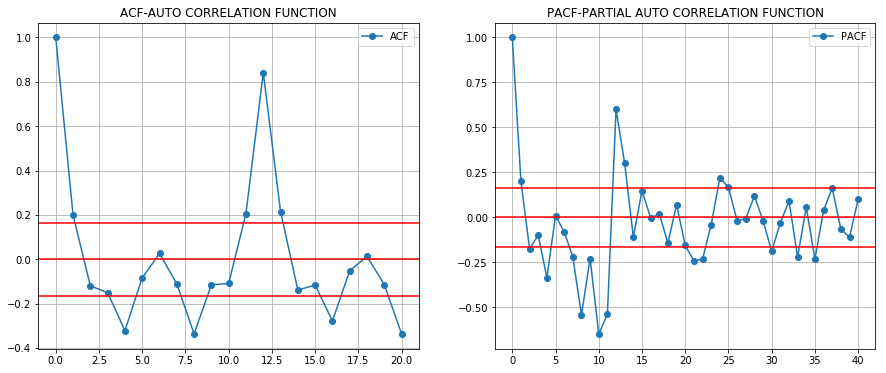

In [0]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(l_acf_s,label='ACF',marker='o')
plt.title('ACF-AUTO CORRELATION FUNCTION')
plt.axhline(y=0,linestyle='-',color='red')
plt.axhline(y=-1.96/np.sqrt(len(diff_i_air_log_s)),linestyle='-',color='red')
plt.axhline(y=1.96/np.sqrt(len(diff_i_air_log_s)),linestyle='-',color='red')
plt.legend(loc='best')
plt.grid()

plt.subplot(122)
plt.plot(l_pacf_s,label='PACF',marker='o')
plt.title('PACF-PARTIAL AUTO CORRELATION FUNCTION')
plt.axhline(y=0,linestyle='-',color='red')
plt.axhline(y=-1.96/np.sqrt(len(diff_i_air_log_s)),linestyle='-',color='red')
plt.axhline(y=1.96/np.sqrt(len(diff_i_air_log_s)),linestyle='-',color='red')
plt.legend(loc='best')
plt.grid()


Substituting values of P and Q which was obtained from ACF and PACF graph in ARIMA model

In [0]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


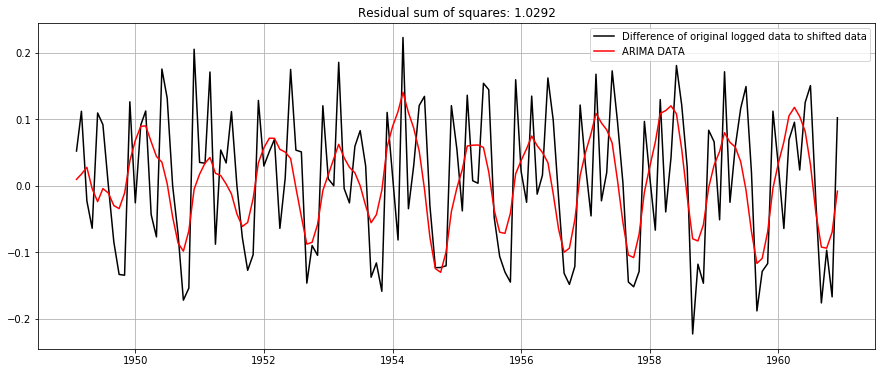

In [0]:
arima=ARIMA(i_air_log,order=(2,1,2))
arima_res=arima.fit()
plt.figure(figsize=(15,6))
plt.title('Residual sum of squares: %.4f'%sum((arima_res.fittedvalues - diff_i_air_log_s['International Airlines Pax'])**2))
plt.plot(diff_i_air_log_s,color='black',label='Difference of original logged data to shifted data')
plt.plot(arima_res.fittedvalues,color='red',label='ARIMA DATA')
plt.legend(loc='best')
plt.grid()
plt.show()

Converting the predicted ARIMA values into a series

In [0]:
arima_pred=pd.Series(arima_res.fittedvalues)
arima_pred.head()

Year-Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [0]:
arima_pred_cumm=arima_pred.cumsum()

In [0]:
arima_pred_log=pd.Series(i_air_log['International Airlines Pax'].iloc[0],index=i_air_log.index)
arima_pred_log.head()

Year-Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
dtype: float64

In [0]:
arima_pred_log=arima_pred_log.add(arima_pred_cumm,fill_value=0)
arima_pred_log.head()

Year-Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

In [0]:
pred_arima=np.exp(arima_pred_log)

Plotting original data vs predicted ARIMA data

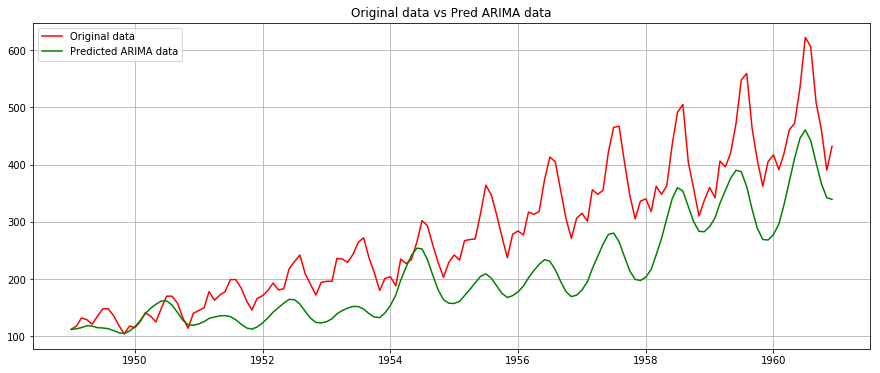

In [0]:
plt.figure(figsize=(15,6))
plt.title('Original data vs Pred ARIMA data')
plt.plot(i_air,color='red',label='Original data')
plt.plot(pred_arima,color='green',label='Predicted ARIMA data')
plt.legend(loc='best')
plt.grid()
plt.show()

In [0]:
i_air_log.shape

(144, 1)

Future prediction

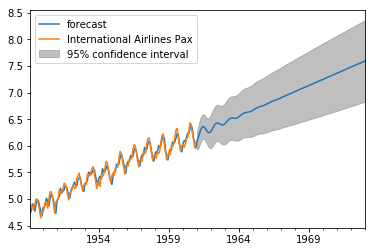

<Figure size 1080x432 with 0 Axes>

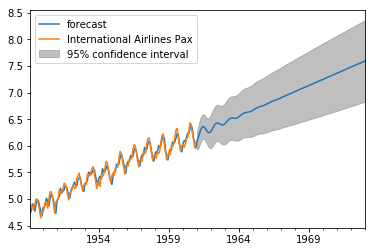

In [0]:
plt.figure(figsize=(15,6))
arima_res.plot_predict(1,288)

In [0]:
fut_pred=arima_res.forecast(steps=144)
print(fut_pred)

(array([6.09553389, 6.15281399, 6.22442963, 6.29241102, 6.3416472 ,
       6.36359368, 6.35784693, 6.3313931 , 6.29597544, 6.26447715,
       6.24738324, 6.25025169, 6.27275833, 6.3094031 , 6.35151493,
       6.38988657, 6.41727384, 6.43011056, 6.4290669 , 6.41842488,
       6.40456152, 6.39403611, 6.39183077, 6.40019497, 6.41833688,
       6.44295405, 6.46937434, 6.49293985, 6.51024118, 6.51989032,
       6.52267575, 6.52112382, 6.5186452 , 6.51853681, 6.52311914,
       6.53322353, 6.54812864, 6.56591553, 6.58410305, 6.60036536,
       6.61313262, 6.62192775, 6.62737781, 6.6309312 , 6.63438679,
       6.63937975, 6.64696495, 6.65739832, 6.67015317, 6.68414244,
       6.69806619, 6.71077894, 6.72157724, 6.73033975, 6.737498  ,
       6.74386367, 6.75037311, 6.7578258 , 6.7666867 , 6.77699812,
       6.78841309, 6.80032843, 6.81207184, 6.82308749, 6.83307124,
       6.8420248 , 6.85022299, 6.85811207, 6.86617326, 6.87479137,
       6.88416288, 6.8942637 , 6.90487876, 6.91567925, 6.9263